In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter(action = 'ignore', category = ConvergenceWarning)
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [51]:
data = pd.read_csv(r"F:\DSA\Kaggle\loan_data.csv")

In [52]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [53]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [54]:
for value in data.columns:
    print(data[value].value_counts())

credit.policy
1    7710
0    1868
Name: count, dtype: int64
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64
int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64
installment
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: count, Length: 4788, dtype: int64
log.annual.inc
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: count, Length: 1987, dtype: int64
dti
0.00     89
10.00    19
0.60     16
15.10    13
12.00    13
         ..
5.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


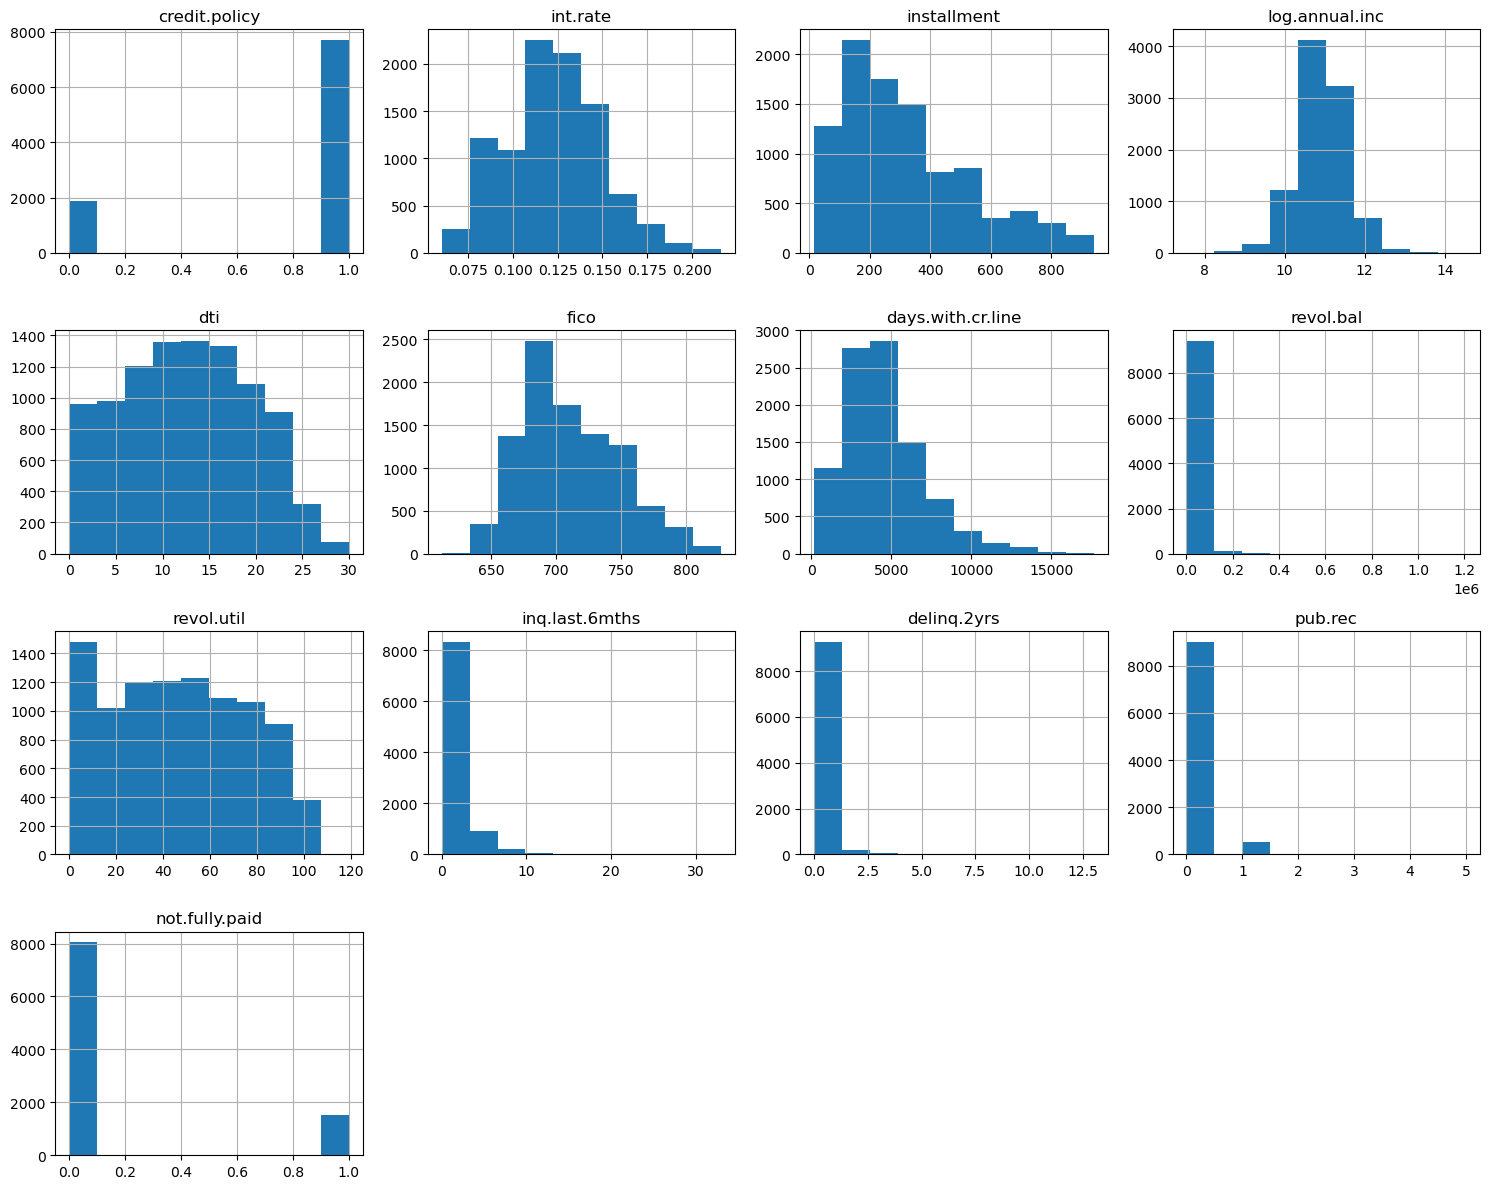

In [56]:
data.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

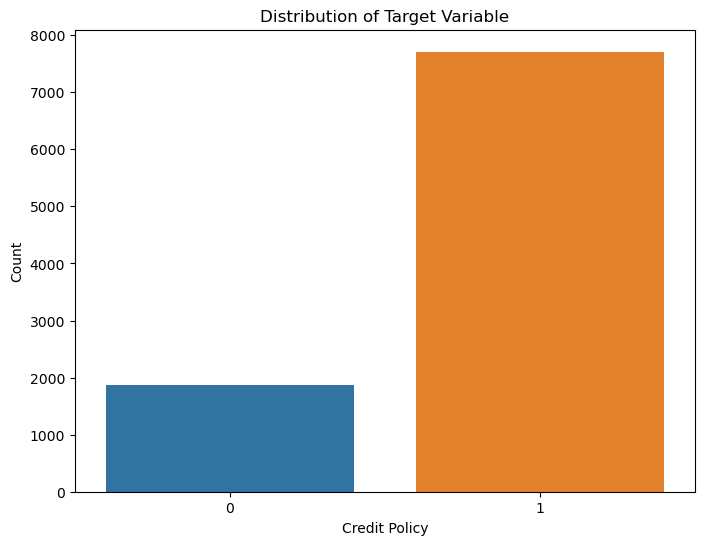

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='credit.policy', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.show()

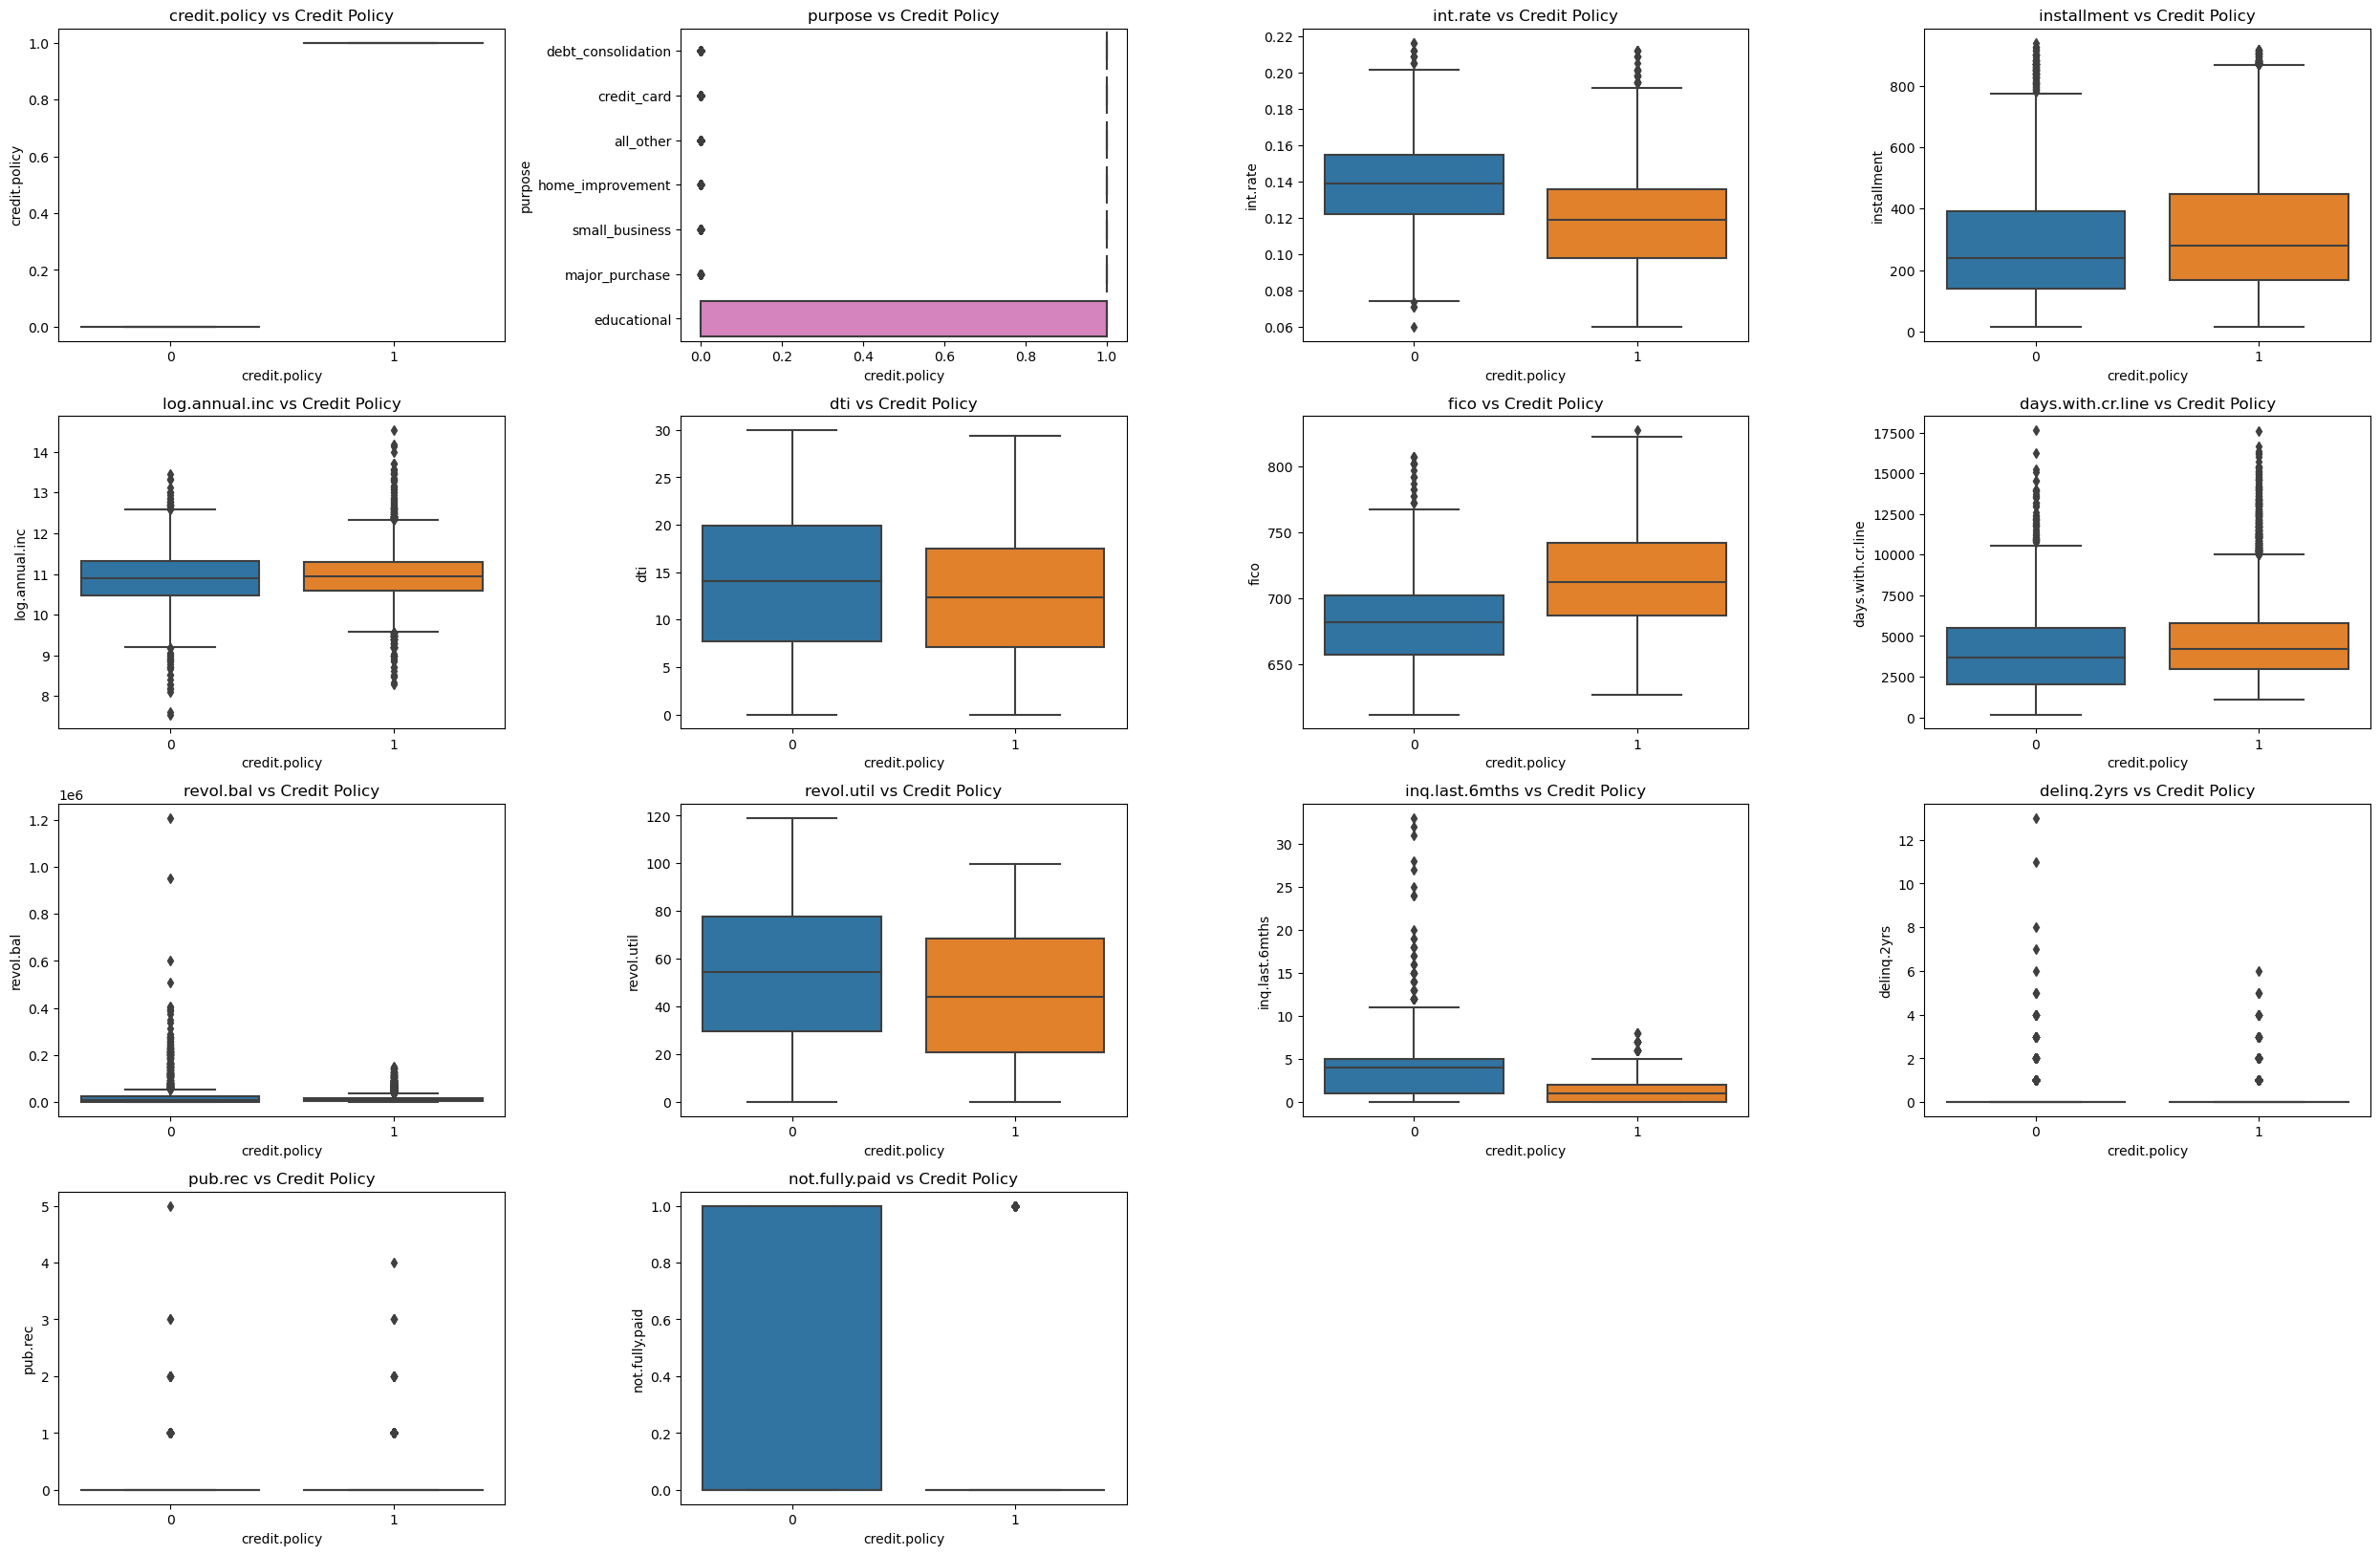

In [58]:
plt.figure(figsize=(25, 20))
for i, column in enumerate(data.columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='credit.policy', y=column, data=data)
    plt.title(f'{column} vs Credit Policy')
plt.tight_layout()
plt.show()


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [60]:
import sklearn.preprocessing as sk
le = sk.LabelEncoder()
data['purpose'] = le.fit_transform(data['purpose'])

In [61]:
def clip_outliers(series, lower_bound=None, upper_bound=None):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clipped_values = series.clip(lower=lower_bound, upper=upper_bound)
    
    return clipped_values

numerical_cols = ['installment', 'log.annual.inc', 'days.with.cr.line','revol.bal', 'revol.util']
for col in numerical_cols:
    data[col] = clip_outliers(data[col])

In [62]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667.0,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0,1,0,0


In [63]:
std_scaler = sk.StandardScaler()

numerical_cols = ['installment', 'log.annual.inc', 'days.with.cr.line','revol.bal', 'revol.util']

data_std_scaled = data.copy()
data_std_scaled[numerical_cols] = std_scaler.fit_transform(data_std_scaled[numerical_cols])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data_std_scaled.drop(columns=['credit.policy'])  # Features
y = data_std_scaled['credit.policy']  # Target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier with a chosen number of neighbors (e.g., k=5)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=12)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8982254697286013

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.49      0.65       372
           1       0.89      1.00      0.94      1544

    accuracy                           0.90      1916
   macro avg       0.93      0.74      0.80      1916
weighted avg       0.91      0.90      0.88      1916



In [65]:
from sklearn.model_selection import cross_val_score

knn_classifier = KNeighborsClassifier(n_neighbors=12)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.91525424 0.90873533 0.90861619 0.91253264 0.9073107  0.91906005
 0.90078329 0.91122715 0.90992167 0.9151436 ]
Mean Cross-Validation Score: 0.9108584870013379


In [66]:
from sklearn.model_selection import KFold, StratifiedKFold

knn_classifier = KNeighborsClassifier(n_neighbors=12)

# Initialize K-Fold cross-validator with 5 folds
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
k_fold_scores = cross_val_score(knn_classifier, X_train, y_train, cv=k_fold)

# Print the K-Fold cross-validation scores
print("K-Fold Cross-Validation Scores:", k_fold_scores)

# Calculate and print the mean K-Fold cross-validation score
mean_k_fold_score = k_fold_scores.mean()
print("Mean K-Fold Cross-Validation Score:", mean_k_fold_score)

# Initialize Stratified K-Fold cross-validator with 5 folds
stratified_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Stratified K-Fold cross-validation
stratified_k_fold_scores = cross_val_score(knn_classifier, X_train, y_train, cv=stratified_k_fold)

# Print the Stratified K-Fold cross-validation scores
print("\nStratified K-Fold Cross-Validation Scores:", stratified_k_fold_scores)

# Calculate and print the mean Stratified K-Fold cross-validation score
mean_stratified_k_fold_score = stratified_k_fold_scores.mean()
print("Mean Stratified K-Fold Cross-Validation Score:", mean_stratified_k_fold_score)

K-Fold Cross-Validation Scores: [0.89830508 0.91264668 0.90469974 0.9151436  0.91906005 0.9073107
 0.92167102 0.91906005 0.9229765  0.90208877]
Mean K-Fold Cross-Validation Score: 0.9122962203968532

Stratified K-Fold Cross-Validation Scores: [0.91134289 0.90743155 0.91253264 0.92819843 0.90861619 0.90992167
 0.90861619 0.90992167 0.91383812 0.92036554]
Mean Stratified K-Fold Cross-Validation Score: 0.9130784889757321


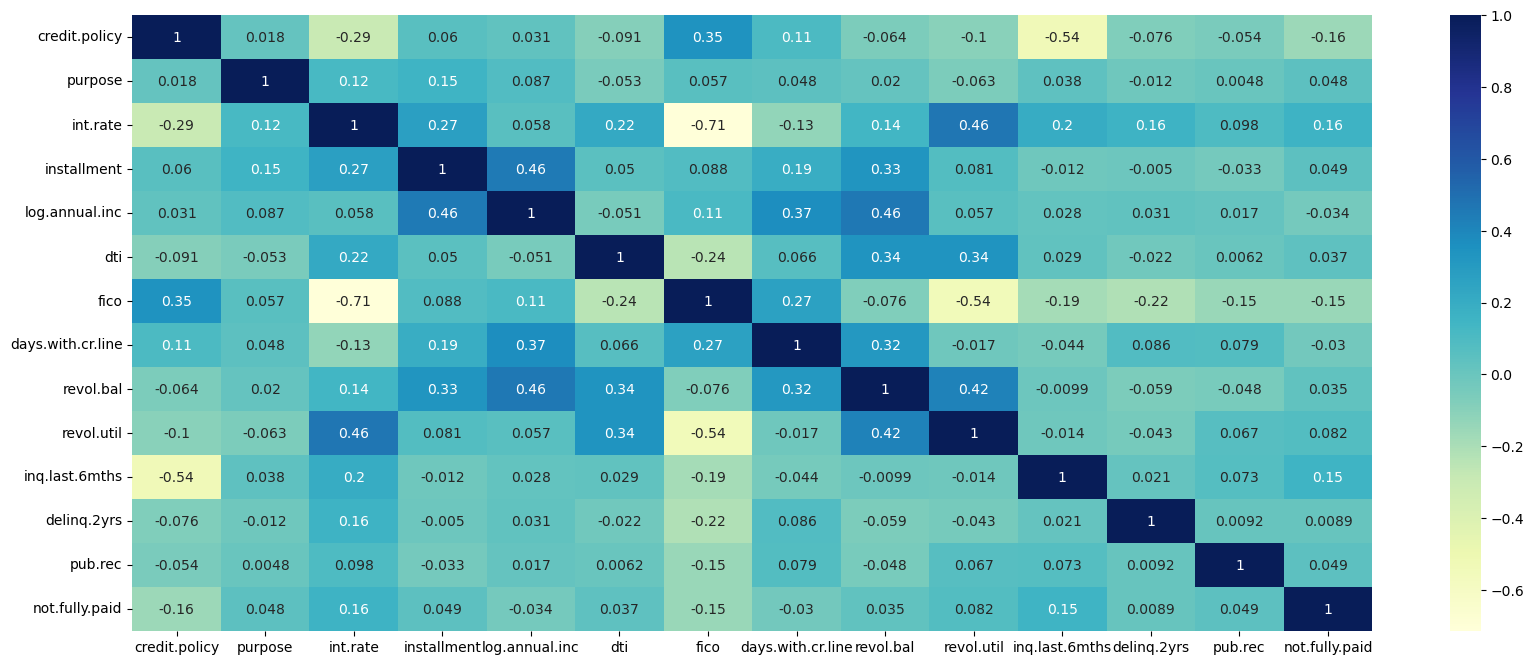

In [67]:
plt.subplots(figsize = (20,8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [68]:
contingency_table = pd.crosstab(data['delinq.2yrs'], data['credit.policy'])

In [69]:
contingency_table

credit.policy,0,1
delinq.2yrs,,
0,1582,6876
1,188,644
2,63,129
3,18,47
4,9,10
5,3,3
6,1,1
7,1,0
8,1,0


In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log_reg = LogisticRegression(max_iter = 1000)

In [72]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
y_pred = log_reg.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69       372
           1       0.91      0.98      0.94      1544

    accuracy                           0.90      1916
   macro avg       0.88      0.78      0.82      1916
weighted avg       0.90      0.90      0.89      1916



In [75]:
accuracy_score(y_test, y_pred)

0.8997912317327766

In [76]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.88657106 0.90482399 0.88511749 0.89947781 0.90469974 0.88381201
 0.89164491 0.88642298 0.89817232 0.90861619]
Mean Cross-Validation Score: 0.894935849210753


In [77]:
cv_scores.std()

0.008858745009456812

In [79]:
import pickle

In [82]:
with open('knn_loan.pkl', 'wb') as f:
    pickle.dump(knn_classifier, f)